In [6]:
from pathlib import Path
import matplotlib as mpl

import matplotlib.pyplot as plt
from flow_analysis_comps.Fourier.OrientationSpaceManager import orientationSpaceManager
from flow_analysis_comps.util.video_io import read_video_metadata, load_tif_series_to_dask
import colorcet  # noqa: F401
from flow_analysis_comps.video_manipulation.control_class import videoControl
from flow_analysis_comps.Classic.extract_velocity import kymoAnalyser, videoDeltas

# mpl.rcParams.update(mpl.rcParamsDefault)

# plt.rcParams["text.usetex"] = True
plt.close("all")

%matplotlib widget

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
video_root_folder = Path(
    r'U:\test_data\20250122_Plate017\033'
)
info_file_address = Path(video_root_folder / "videoInfo.txt")
video_operator = videoControl(video_root_folder, info_file_address, resolution=1)
mean_img = video_operator.mean_img
kymographs = video_operator.get_kymographs()


Initiating filters on new image with dims (600, 1927)


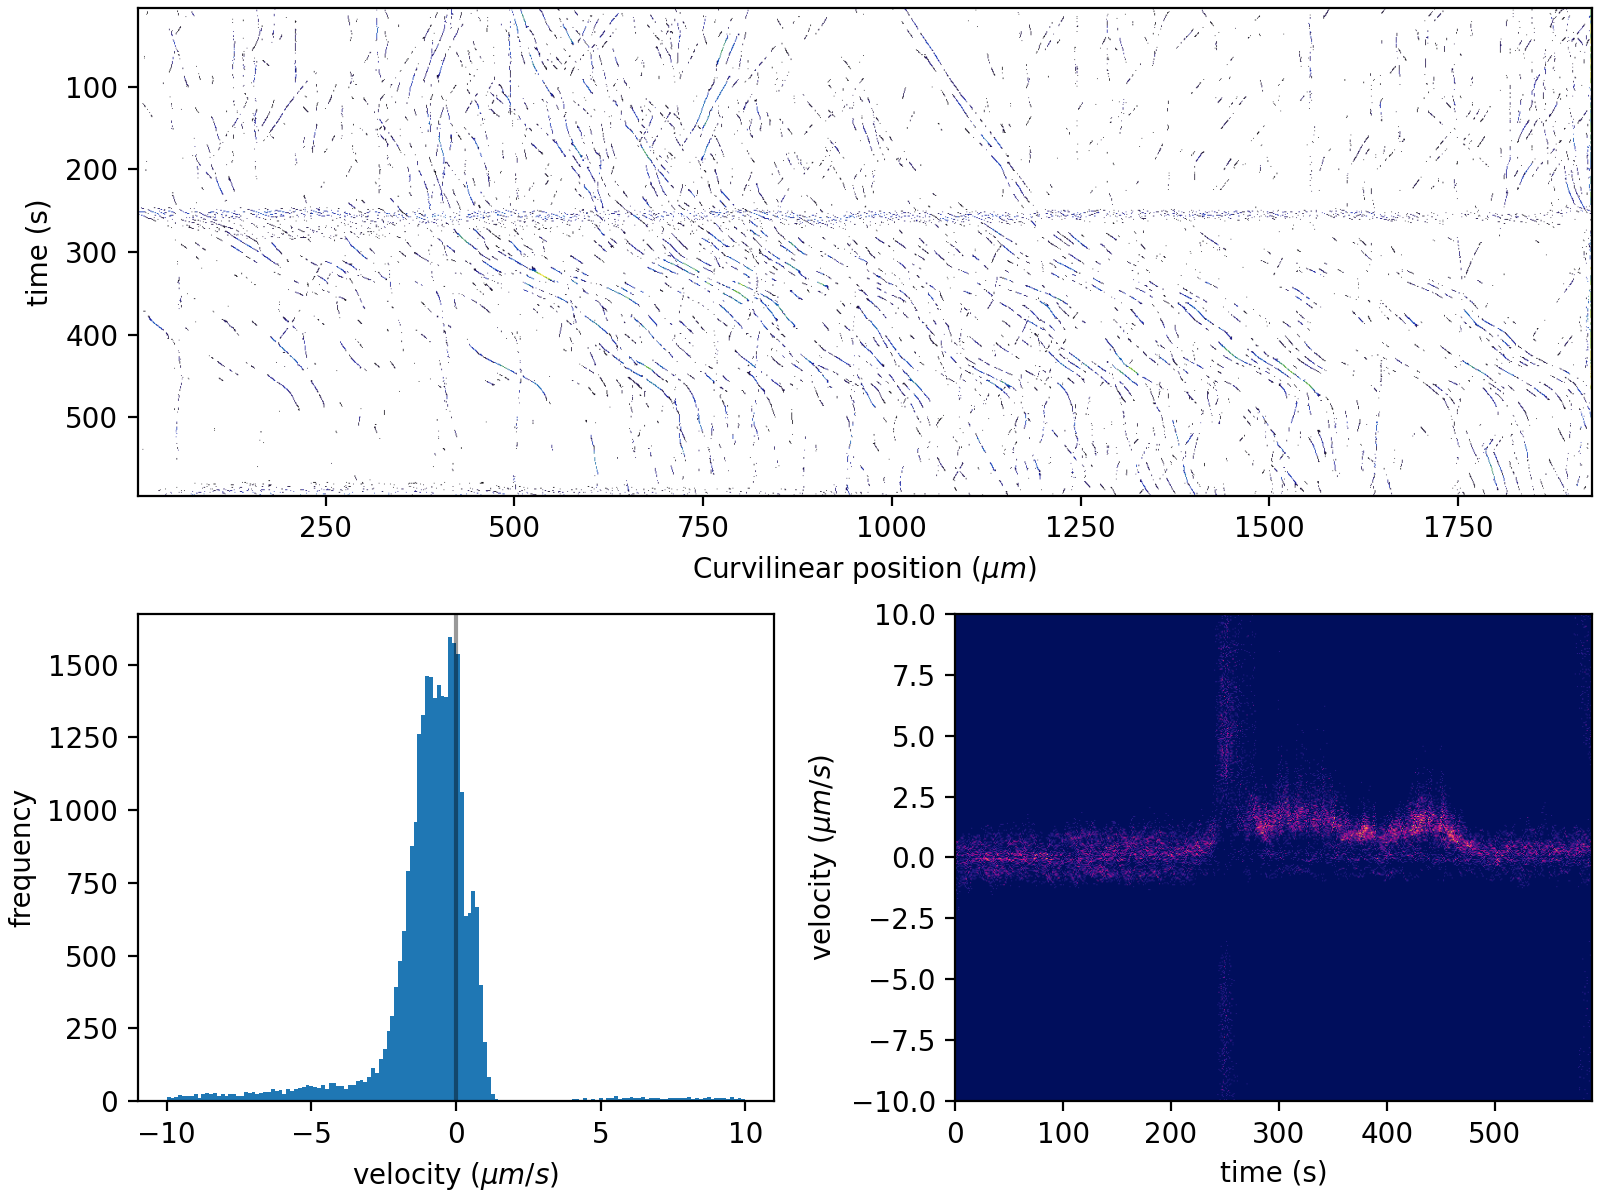

In [ ]:
video_deltas = videoDeltas(
    delta_t=1,
    delta_x=1
)

OSFilter = orientationSpaceManager(
    0.15,
    freq_width=0.2,
    K=16,
    x_spacing=video_deltas.delta_x,
    y_spacing=video_deltas.delta_t,
)
new_order = 8
speed_limit=10

for key, kymo in kymographs.items():
    invert_im = video_operator.video_info.mode == "brightfield"
    OSFilter.get_response(kymo)